# Lab 3a: Graphs I

Lab associated with Module 3a: Graphs I

***

In [2]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

C:\Users\25848\AppData\Local\Temp\ipykernel_22408\1522478529.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


***

### Section 0: Imports

In [3]:
import numpy as np

In [4]:
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### Section 1: Coming up with a way to visualize the graph data and encode data in the graph

Let us come up with some example to work on

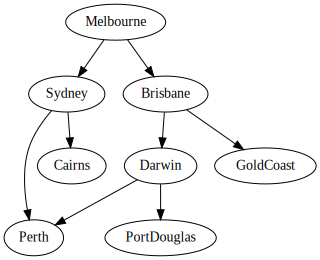

In [2]:
dot = Digraph()

dot.edge('Melbourne', 'Sydney')
dot.edge('Melbourne', 'Brisbane')
dot.edge('Sydney', 'Perth')
dot.edge('Sydney', 'Cairns')
dot.edge('Brisbane', 'Darwin')
dot.edge('Brisbane', 'GoldCoast')
dot.edge('Darwin', 'Perth')
dot.edge('Darwin', 'PortDouglas')

#dot.view()
dot

This is pretty cool display, but we need to encode this information in a graph, let us try to do that in the following:

In [6]:
class Node:
    
    def __init__(self, v):

        self.value = v
        self.inNeighbors = []
        self.outNeighbors = []
        self.status = "unvisited"
        
    def hasOutNeighbor(self, v):
        
        if v in self.outNeighbors:
            return True
        return False
        
    def hasInNeighbor(self, v):
        if v in self.inNeighbors:
            return True
        return False
    
    def hasNeighbor(self, v):
        if v in self.inNeighbors or v in self.outNeighbors:
            return True
        return False
    
    def getOutNeighbors(self):
        return self.outNeighbors
    
    def getInNeighbors(self):
        return self.inNeighbors
        
    def addOutNeighbor(self, v):
        self.outNeighbors.append(v)
    
    def addInNeighbor(self, v):
        self.inNeighbors.append(v)
    
    def __str__(self):
        return str(self.value) 

In [7]:
class Graph:
    
    def __init__(self):
        
        self.vertices = []

    def addVertex(self,n):
        
        self.vertices.append(n)
        
    # add a directed edge from CS161Node u to CS161Node v
    def addDiEdge(self, u, v):
        
        u.addOutNeighbor(v)
        v.addInNeighbor(u)
        
    # add edges in both directions between u and v
    def addBiEdge(self, u, v):
        
        self.addDiEdge(u, v)
        self.addDiEdge(v, u)
        
    # get a list of all the directed edges
    # directed edges are a list of two vertices
    def getDirEdges(self):
        
        ret = []
        for v in self.vertices:
            ret += [ [v, u] for u in v.outNeighbors ]
        return ret
    
    def __str__(self):
        ret = "Graph with:\n"
        ret += "\t Vertices:\n\t"
        for v in self.vertices:
            ret += str(v) + ","
        ret += "\n"
        ret += "\t Edges:\n\t"
        for a,b in self.getDirEdges():
            ret += "(" + str(a) + "," + str(b) + ") "
        ret += "\n"
        return ret

In [8]:
G = Graph()
for i in range(10):
    G.addVertex( Node(i) )

In [9]:
V = G.vertices
for i in range(9):
    G.addDiEdge( V[i], V[i+1] )

In [10]:
print(G)

Graph with:
	 Vertices:
	0,1,2,3,4,5,6,7,8,9,
	 Edges:
	(0,1) (1,2) (2,3) (3,4) (4,5) (5,6) (6,7) (7,8) (8,9) 



Okay, now that our implementation is working fine, let us try to plug-in our data

In [11]:
G = Graph()
for i in ['Melbourne', 'Sydney', 'Brisbane', 'Perth', 'Darwin', 'GoldCoast', 'PortDouglas', 'Cairns']:
    G.addVertex( Node(i) )

In [12]:
V = G.vertices

In [13]:
for i in range(len(V)):
    print(i, V[i].value)

0 Melbourne
1 Sydney
2 Brisbane
3 Perth
4 Darwin
5 GoldCoast
6 PortDouglas
7 Cairns


In [14]:
#dot.edge('Melbourne', 'Sydney')
G.addDiEdge( V[0], V[1] )

#dot.edge('Melbourne', 'Brisbane')
G.addDiEdge( V[0], V[2] )

#dot.edge('Sydney', 'Perth')
G.addDiEdge( V[1], V[3] )

#dot.edge('Sydney', 'Cairns')
G.addDiEdge( V[1], V[7] )

#dot.edge('Brisbane', 'Darwin')
G.addDiEdge( V[2], V[4] )

#dot.edge('Brisbane', 'GoldCoast')
G.addDiEdge( V[2], V[5] )

#dot.edge('Darwin', 'Perth')
G.addDiEdge( V[4], V[3] )

#dot.edge('Darwin', 'PortDouglas')
G.addDiEdge( V[4], V[6] )

In [15]:
print(G)

Graph with:
	 Vertices:
	Melbourne,Sydney,Brisbane,Perth,Darwin,GoldCoast,PortDouglas,Cairns,
	 Edges:
	(Melbourne,Sydney) (Melbourne,Brisbane) (Sydney,Perth) (Sydney,Cairns) (Brisbane,Darwin) (Brisbane,GoldCoast) (Darwin,Perth) (Darwin,PortDouglas) 



Sounds beautiful, now we have the data in graph format. Let us see if you we can start coding our clever algorithms.

***

### Section 2: Doing a simple DFS

In [16]:
def DFS(root):
    if root == None:
        return
    root.visited = True
    for n in root.neighbours:
        if n.visited == False:
            DFS(n)

In [17]:
def DFS_helper(w):
    
    w.status = "inprogress"
    
    for v in w.getOutNeighbors():
        
        if v.status == "unvisited":
            
            DFS_helper(v)
    
    print(w)
    w.status = "done"
    
        
def DFS(w, G):
    
    for v in G.vertices:
        
        v.status = "unvisited"
        
    return DFS_helper(w)

In [18]:
# Let us do the DFS from Melbourne
w = G.vertices[0]


DFS(w, G)

Perth
Cairns
Sydney
PortDouglas
Darwin
GoldCoast
Brisbane
Melbourne


### <font color='red'> Activity 1 - Code Reflections. </font>

Perth
Cairns
Sydney
PortDouglas
Darwin
GoldCoast
Brisbane
Melbourne


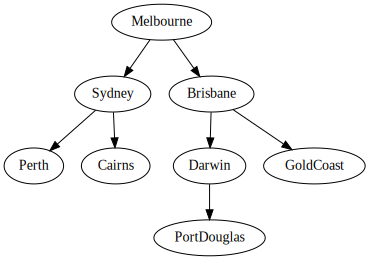

In [19]:
#### TODO ####
### Good Luck ###
G1 = Graph()
for i in ['Melbourne', 'Sydney', 'Brisbane', 'Perth', 'Darwin', 'GoldCoast', 'PortDouglas', 'Cairns']:
    G1.addVertex(Node(i))
V = G1.vertices

G1.addDiEdge( V[0], V[1] )
G1.addDiEdge( V[0], V[2] )
G1.addDiEdge( V[1], V[3] )
G1.addDiEdge( V[1], V[7] )
G1.addDiEdge( V[2], V[4] )
G1.addDiEdge( V[2], V[5] )
G1.addDiEdge( V[4], V[6] )
# print(G1)

dot1 = Digraph()
dot1.edge('Melbourne', 'Sydney')
dot1.edge('Melbourne', 'Brisbane')
dot1.edge('Sydney', 'Perth')
dot1.edge('Sydney', 'Cairns')
dot1.edge('Brisbane', 'Darwin')
dot1.edge('Brisbane', 'GoldCoast')
dot1.edge('Darwin', 'PortDouglas')


def pre_order(G1, w):
    if w is None:
        return
    print(w)
    if len(w.getOutNeighbors()) == 0:
        pre_order(G1, None)
        pre_order(G1, None)
    if len(w.getOutNeighbors()) == 1:
        pre_order(G1, w.getOutNeighbors()[0])
        pre_order(G1, None)
    if len(w.getOutNeighbors()) == 2:
        pre_order(G1, w.getOutNeighbors()[0])
        pre_order(G1, w.getOutNeighbors()[1])

def in_order(G1, w):
    if w is None:
        return
    if len(w.getOutNeighbors()) == 0:
        in_order(G1, None)
        print(w)
        in_order(G1, None)
    if len(w.getOutNeighbors()) == 1:
        in_order(G1, w.getOutNeighbors()[0])
        print(w)
        in_order(G1, None)
    if len(w.getOutNeighbors()) == 2:
        in_order(G1, w.getOutNeighbors()[0])
        print(w)
        in_order(G1, w.getOutNeighbors()[1])

def post_order(G1, w):
    if w is None:
        return
    if len(w.getOutNeighbors()) == 0:
        post_order(G1, None)
        in_order(G1, None)
    if len(w.getOutNeighbors()) == 1:
        post_order(G1, w.getOutNeighbors()[0])
        post_order(G1, None)
    if len(w.getOutNeighbors()) == 2:
        post_order(G1, w.getOutNeighbors()[0])
        post_order(G1, w.getOutNeighbors()[1])
    print(w)

# pre_order(G1, G1.vertices[0])
# in_order(G1, G1.vertices[0])
post_order(G1, G1.vertices[0])
dot1

***

### Section 4: Breadth First Search (BFS)

Now let us see if we can do BFS on the graph

In [20]:
def BFS(root):

    visited = [False] * (len(V))

    # Create a queue for BFS
    queue = []

    queue.append(root)
    visited[root] = True

    while queue:

        r = queue.pop(0)
        print(r)

        for n in r.adjacent:
            
            if visited[n] == False:
                
                visited[n] = True
                queue.append(n)
                

In [21]:
def BFS(w, G):
    for v in G.vertices:
        v.status = "unvisited"
    n = len(G.vertices)
    Ls = [ [] for i in range(n) ]
    Ls[0] = [w]
    w.status = "visited"
    for i in range(n):
        for u in Ls[i]:
            print(u)
            for v in u.getOutNeighbors():
                if v.status == "unvisited":
                    v.status = "visited"
                    Ls[i + 1].append(v)

In [22]:
# Let us do the BFS from Melbourne
w = G.vertices[0]

BFS(w, G)

Melbourne
Sydney
Brisbane
Perth
Cairns
Darwin
GoldCoast
PortDouglas


***

### <font color='red'> Activity 2 - Code Reflections. </font>

Melbourne
Sydney
Brisbane
Perth
Cairns
Darwin
GoldCoast
PortDouglas


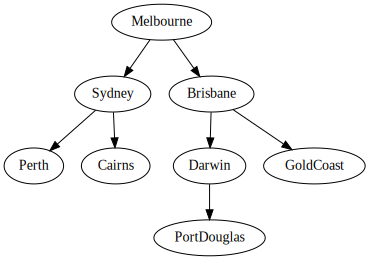

In [23]:
#### TODO ####
### Good Luck ###
G1 = Graph()
for i in ['Melbourne', 'Sydney', 'Brisbane', 'Perth', 'Darwin', 'GoldCoast', 'PortDouglas', 'Cairns']:
    G1.addVertex(Node(i))
V = G1.vertices

G1.addDiEdge( V[0], V[1] )
G1.addDiEdge( V[0], V[2] )
G1.addDiEdge( V[1], V[3] )
G1.addDiEdge( V[1], V[7] )
G1.addDiEdge( V[2], V[4] )
G1.addDiEdge( V[2], V[5] )
G1.addDiEdge( V[4], V[6] )
# print(G1)

dot1 = Digraph()
dot1.edge('Melbourne', 'Sydney')
dot1.edge('Melbourne', 'Brisbane')
dot1.edge('Sydney', 'Perth')
dot1.edge('Sydney', 'Cairns')
dot1.edge('Brisbane', 'Darwin')
dot1.edge('Brisbane', 'GoldCoast')
dot1.edge('Darwin', 'PortDouglas')

BFS(G1.vertices[0], G1)
dot1

### <font color='red'> Activity 3: Bidirectional search is used to find the shortest path between a source and a destination. It operates by essentially running two simultaneous breadth-first searches one from each node. When their searches collide, we have a match. Design an algorithm for bi-directional search, and then code it in this week's ipynb. </font>

Path exists between 0 and 14
Intersection at : 7
*****Path*****
0 4 6 7 8 10 14
Path exists between 0 and 14
Intersection at : 7
*****Path*****
0 4 6 7 8 10 14
Path exists between 0 and 14
Intersection at : 6
*****Path*****
0 4 6 7 8 10 14
Path exists between 0 and 14
Intersection at : 6
*****Path*****
0 4 6 7 8 10 14
Path exists between 0 and 14
Intersection at : 6
*****Path*****
0 4 6 7 8 10 14
Path exists between 0 and 14
Intersection at : 4
*****Path*****
0 4 6 7 8 10 14
Path exists between 0 and 14
Intersection at : 2
*****Path*****
0 4 6 5 2 5 6 7 8 10 14
Path exists between 0 and 14
Intersection at : 0
*****Path*****
0 4 6 7 8 10 14
Path exists between 0 and 14
Intersection at : 0
*****Path*****
0 4 6 7 8 10 14
Path exists between 0 and 14
Intersection at : 0
*****Path*****
0 4 6 7 8 10 14
Path exists between 0 and 14
Intersection at : 0
*****Path*****
0 4 6 7 8 10 14
Path exists between 0 and 14
Intersection at : 0
*****Path*****
0 4 6 7 8 10 14
Path does not exist between 0 an

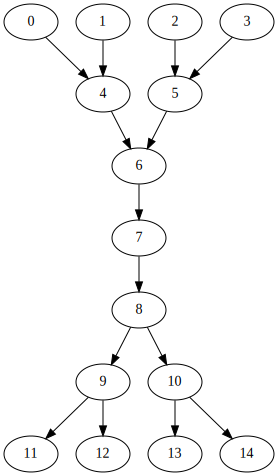

In [2]:
#### TODO ####
### Good Luck ###
# Python3 program for Bidirectional BFS
# Search to check path between two vertices

# Class definition for node to
# be added to graph
class AdjacentNode:

	def __init__(self, vertex):

		self.vertex = vertex
		self.next = None

# BidirectionalSearch implementation
class BidirectionalSearch:

	def __init__(self, vertices):

		# Initialize vertices and
		# graph with vertices
		self.vertices = vertices
		self.graph = [None] * self.vertices

		# Initializing queue for forward
		# and backward search
		self.src_queue = list()
		self.dest_queue = list()

		# Initializing source and
		# destination visited nodes as False
		self.src_visited = [False] * self.vertices
		self.dest_visited = [False] * self.vertices

		# Initializing source and destination
		# parent nodes
		self.src_parent = [None] * self.vertices
		self.dest_parent = [None] * self.vertices

	# Function for adding undirected edge
	def add_edge(self, src, dest):

		# Add edges to graph

		# Add source to destination
		node = AdjacentNode(dest)
		node.next = self.graph[src]
		self.graph[src] = node

		# Since graph is undirected add
		# destination to source
		node = AdjacentNode(src)
		node.next = self.graph[dest]
		self.graph[dest] = node

	# Function for Breadth First Search
	def bfs(self, direction = 'forward'):

		if direction == 'forward':

			# BFS in forward direction
			current = self.src_queue.pop(0)
			connected_node = self.graph[current]

			while connected_node:
				vertex = connected_node.vertex

				if not self.src_visited[vertex]:
					self.src_queue.append(vertex)
					self.src_visited[vertex] = True
					self.src_parent[vertex] = current

				connected_node = connected_node.next
		else:

			# BFS in backward direction
			current = self.dest_queue.pop(0)
			connected_node = self.graph[current]

			while connected_node:
				vertex = connected_node.vertex

				if not self.dest_visited[vertex]:
					self.dest_queue.append(vertex)
					self.dest_visited[vertex] = True
					self.dest_parent[vertex] = current

				connected_node = connected_node.next

	# Check for intersecting vertex
	def is_intersecting(self):

		# Returns intersecting node
		# if present else -1
		for i in range(self.vertices):
			if (self.src_visited[i] and
				self.dest_visited[i]):
				return i

		return -1

	# Print the path from source to target
	def print_path(self, intersecting_node,
				src, dest):

		# Print final path from
		# source to destination
		path = list()
		path.append(intersecting_node)
		i = intersecting_node

		while i != src:
			path.append(self.src_parent[i])
			i = self.src_parent[i]

		path = path[::-1]
		i = intersecting_node

		while i != dest:
			path.append(self.dest_parent[i])
			i = self.dest_parent[i]

		print("*****Path*****")
		path = list(map(str, path))

		print(' '.join(path))

	# Function for bidirectional searching
	def bidirectional_search(self, src, dest):

		# Add source to queue and mark
		# visited as True and add its
		# parent as -1
		self.src_queue.append(src)
		self.src_visited[src] = True
		self.src_parent[src] = -1

		# Add destination to queue and
		# mark visited as True and add
		# its parent as -1
		self.dest_queue.append(dest)
		self.dest_visited[dest] = True
		self.dest_parent[dest] = -1

		while self.src_queue and self.dest_queue:

			# BFS in forward direction from
			# Source Vertex
			self.bfs(direction = 'forward')

			# BFS in reverse direction
			# from Destination Vertex
			self.bfs(direction = 'backward')

			# Check for intersecting vertex
			intersecting_node = self.is_intersecting()

			# If intersecting vertex exists
			# then path from source to
			# destination exists
			if intersecting_node != -1:
				print(f"Path exists between {src} and {dest}")
				print(f"Intersection at : {intersecting_node}")
				self.print_path(intersecting_node,
								src, dest)
				exit(0)
		return -1

# Driver code
if __name__ == '__main__':

	# Number of Vertices in graph
	n = 15

	# Source Vertex
	src = 0

	# Destination Vertex
	dest = 14

	# Create a graph
	graph = BidirectionalSearch(n)
	graph.add_edge(0, 4)
	graph.add_edge(1, 4)
	graph.add_edge(2, 5)
	graph.add_edge(3, 5)
	graph.add_edge(4, 6)
	graph.add_edge(5, 6)
	graph.add_edge(6, 7)
	graph.add_edge(7, 8)
	graph.add_edge(8, 9)
	graph.add_edge(8, 10)
	graph.add_edge(9, 11)
	graph.add_edge(9, 12)
	graph.add_edge(10, 13)
	graph.add_edge(10, 14)

	out = graph.bidirectional_search(src, dest)

	if out == -1:
		print(f"Path does not exist between {src} and {dest}")

dot1 = Digraph()
dot1.edge("0", "4")
dot1.edge('1', '4')
dot1.edge('2', '5')
dot1.edge('3', '5')
dot1.edge('4', '6')
dot1.edge('5', '6')
dot1.edge('6', '7')
dot1.edge("7", "8")
dot1.edge('8', '9')
dot1.edge('8', '10')
dot1.edge('9', '11')
dot1.edge('9', '12')
dot1.edge('10', '13')
dot1.edge('10', '14')
dot1
    






***

### <font color='red'> Activity 4: Design an algorithm using BFS to determine if a graph is bi-partite. Modify the BFS code in this week's lab book, and implement your designed algorithm. </font>

True


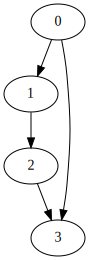

In [29]:
#### TODO ####
### Good Luck ###
G1 = Graph()
for i in ['0', '1', '2', '3']:
    G1.addVertex(Node(i))
V = G1.vertices

G1.addDiEdge( V[0], V[1] )
# G1.addDiEdge( V[0], V[2] )
G1.addDiEdge( V[0], V[3] )
G1.addDiEdge( V[1], V[2] )
G1.addDiEdge( V[2], V[3] )
# print(G1)

dot1 = Digraph()
dot1.edge('0', '1')
# dot1.edge('0', '2')
dot1.edge('0', '3')
dot1.edge('1', '2')
dot1.edge('2', '3')

def BFS(w, G):
    for v in G.vertices:
        v.status = "unvisited"
    n = len(G.vertices)
    Ls = [ [] for i in range(n) ]
    Ls[0] = [w]
    w.status = "visited"
    for i in range(n):
        for u in Ls[i]:
            print(u)
            for v in u.getOutNeighbors():
                if v.status == "unvisited":
                    v.status = "visited"
                    Ls[i + 1].append(v)

def is_bipartite(w, G):
    for v in G.vertices:
        v.status = "unvisited"
    n = len(G.vertices)
    Ls = [ [] for i in range(n) ]
    dct = dict()
    Ls[0] = [w]
    w.status = "visited"
    for i in range(n):
        for u in Ls[i]:
            # print(u)
            dct.setdefault(u.value, "Y")
            for v in u.getOutNeighbors():
                Ls[i + 1].append(v)
                if dct[u.value] == "Y":
                    dct.setdefault(v.value, "N")
                if dct[u.value] == "N":
                    dct.setdefault(v.value, "Y")
                if dct[u.value] == dct[v.value]:
                    return False
    # print(dct)
    return True
print(is_bipartite(G1.vertices[0], G1))
dot1


***

### Section 7: Developing Algorithm for Strongly Connected Components

We will have to modify our DFS to incorporate the in and out time. We will have to modify our graph as well

Let us start by adding inTime and outTime in the Node first

In [30]:
class Node:
    
    def __init__(self, v):

        self.value = v
        self.inNeighbors = []
        self.outNeighbors = []
        
        self.status = "unvisited"
        self.inTime = None
        self.outTime = None
        
    def hasOutNeighbor(self, v):
        
        if v in self.outNeighbors:
            return True
        return False
        
    def hasInNeighbor(self, v):
        
        if v in self.inNeighbors:
            return True
        return False
    
    def hasNeighbor(self, v):
        if v in self.inNeighbors or v in self.outNeighbors:
            return True
        return False
    
    def getOutNeighbors(self):
        return self.outNeighbors
    
    def getInNeighbors(self):
        return self.inNeighbors
        
    def addOutNeighbor(self, v):
        self.outNeighbors.append(v)
    
    def addInNeighbor(self, v):
        self.inNeighbors.append(v)
    
    def __str__(self):
        return str(self.value) 

We should modify our Graph data structure to be able to reverse edges in the graph, we will do this by adding an extra function reverseEdge(u, v)

In [31]:
class Graph:
    
    def __init__(self):
        
        self.vertices = []

    def addVertex(self,n):
        
        self.vertices.append(n)
        
    # add a directed edge from CS161Node u to CS161Node v
    def addDiEdge(self, u, v):
        
        u.addOutNeighbor(v)
        v.addInNeighbor(u)
        
    # add edges in both directions between u and v
    def addBiEdge(self, u, v):
        
        self.addDiEdge(u, v)
        self.addDiEdge(v, u)
        
    # get a list of all the directed edges
    # directed edges are a list of two vertices
    def getDirEdges(self):
        
        ret = []
        for v in self.vertices:
            ret += [ [v, u] for u in v.outNeighbors ]
        return ret
    
    # reverse the edge between u and v.  Multiple edges are not supported.
    def reverseEdge(self,u,v):
        
        if u.hasOutNeighbor(v) and v.hasInNeighbor(u):
            
            if v.hasOutNeighbor(u) and u.hasInNeighbor(v): 
                return
        
            self.addDiEdge(v, u)
            u.outNeighbors.remove(v)
            v.inNeighbors.remove(u)        
                
    def __str__(self):
        ret = "Graph with:\n"
        ret += "\t Vertices:\n\t"
        for v in self.vertices:
            ret += str(v) + ","
        ret += "\n"
        ret += "\t Edges:\n\t"
        for a,b in self.getDirEdges():
            ret += "(" + str(a) + "," + str(b) + ") "
        ret += "\n"
        return ret

Okay, let us now modify our DFS to include in and out time during graph traversal

In [32]:
def DFS(w, currentTime, ordering, verbose):
    
    if verbose:
        print("Time", currentTime, ":\t entering", w)
    
    w.inTime = currentTime
    currentTime += 1
    w.status = "inprogress"
    
    for v in w.getOutNeighbors():
        
        if v.status == "unvisited":
            currentTime = DFS(v, currentTime, ordering, verbose)
            currentTime += 1
    
    w.outTime = currentTime
    w.status = "done"
    ordering.insert(0, w)
    
    if verbose:
        print("Time", currentTime, ":\t leaving", w)
    
    return currentTime

An now the SCC algorithm:

In [33]:
def SCC(G, verbose=False):
    
    ordering = []
    
    for v in G.vertices:
        v.status = "unvisited"
        v.inTime = None
        v.outTime = None
    
    currentTime = 0
    for w in G.vertices:
        
        if w.status == "unvisited":
            currentTime = DFS(w, currentTime, ordering, verbose)
        currentTime += 1
    
    # now reverse all the edges
    E = G.getDirEdges()
    for x,y in E:
        G.reverseEdge(x,y)
   
    # and do it again, but this tim in the order "ordering"
    SCCs = []
    for v in ordering:
        v.status = "unvisited"
        v.inTime = None
        v.outTime = None
    
    currentTime = 0
    for w in ordering:
        visited = [] 
        
        if w.status == "unvisited":
            currentTime = DFS(w, currentTime, visited, verbose)
            SCCs.append(visited[:])
    
    return SCCs

Let us look at the example that we did in the lecture:

In [34]:
stanford = Node("Stanford")
wiki = Node("Wikipedia")
nytimes = Node("NYTimes")
cal = Node("Berkeley")
puppies = Node("Puppies")
google = Node("Google")

G = Graph()
V = [ stanford, wiki, nytimes, cal, puppies, google ]
for v in V:
    G.addVertex(v)
    
E = [ (stanford, wiki), (stanford, puppies), (wiki, stanford), (wiki, nytimes), (nytimes, stanford), (cal, stanford), (cal, puppies), (wiki,puppies), (nytimes, puppies), (puppies, google), (google, puppies) ]
for x,y in E:
    G.addDiEdge( x,y )

print(G)

Graph with:
	 Vertices:
	Stanford,Wikipedia,NYTimes,Berkeley,Puppies,Google,
	 Edges:
	(Stanford,Wikipedia) (Stanford,Puppies) (Wikipedia,Stanford) (Wikipedia,NYTimes) (Wikipedia,Puppies) (NYTimes,Stanford) (NYTimes,Puppies) (Berkeley,Stanford) (Berkeley,Puppies) (Puppies,Google) (Google,Puppies) 



In [35]:
SCCs = SCC(G, False)
for X in SCCs:
    print ([str(x) for x in X])

['Berkeley']
['Stanford', 'NYTimes', 'Wikipedia']
['Puppies', 'Google']


Play around with above SCC Code -- Try applying it on the Australian cities data we had before.

### <font color='red'> Activity 5 - Code Reflections. </font>

Graph with:
	 Vertices:
	A,B,C,D,E,F,
	 Edges:
	(A,B) (A,C) (B,A) (B,C) (C,A) (C,B) (C,D) (D,E) (D,F) (E,D) (E,F) (F,D) (F,E) 

['A', 'B', 'C']
['D', 'E', 'F']


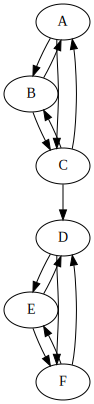

In [38]:
#### TODO ####
### Good Luck ###
A = Node("A")
B = Node("B")
C = Node("C")
D = Node("D")
E = Node("E")
F = Node("F")

G = Graph()
V = [ A, B, C, D, E, F]
for v in V:
    G.addVertex(v)

E = [ (A, B), (A, C), (B, A), (B, C), (C, A), (C, B), (C, D), (D,E), (D, F), (E, D), (E, F), (F, D), (F, E)]
for x,y in E:
    G.addDiEdge( x,y )
print(G)

SCCs = SCC(G, False)
for X in SCCs:
    print ([str(x) for x in X])

dot1 = Digraph()
dot1.edge('A', 'B')
dot1.edge('A', 'C')
dot1.edge('B', 'A')
dot1.edge('B', 'C')
dot1.edge('C', 'A')
dot1.edge('C', 'B')
dot1.edge('C', 'D')
dot1.edge('D', 'E')
dot1.edge('D', 'F')
dot1.edge('E', 'D')
dot1.edge('E', 'F')
dot1.edge('F', 'D')
dot1.edge('F', 'E')
dot1


***